In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import calendar
import scipy.stats as stats
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import imageio
from shapely.geometry import box
import contextily as ctx
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir("C:\\Users\\omkarp\\Downloads\\Vania\\Shapefiles\\PointSynpunkt\\")

In [2]:
data = gpd.read_file('00Sto_Synpunkt.shp')
data = data.reset_index(drop=True)
data = data.to_crs(epsg=4326)
data['x'] = data['geometry'].x
data['y'] = data['geometry'].y
data.head()

,Ärendenum,Kategori,Gata_Gator,Gatunummer,Områdesty,Inkommet_D,DpFeatureT,SynpunktCo,Koordinate,Koordina_1,Season,Time_of_Da,Month,Weekday,Year,geometry,x,y
0,2,Fråga,Tackjärnsvägen,2,Gata,2018-01-01,Städning,NaN,148361.65,6581124.62,Winter,Morning,January,Monday,2018,POINT (17.97121 59.34520),17.971206,59.345205
1,3,Fråga,Drottningholmsvägen,428,Gata,2018-01-01,Parkering,NaN,146492.62,6580523.56,Winter,Morning,January,Monday,2018,POINT (17.93837 59.33980),17.938368,59.339798
2,4,Fråga,Gamla Bromstensvägen,111,Gata,2018-01-01,Gatuunderhåll,NaN,145686.55,6583814.34,Winter,Morning,January,Monday,2018,POINT (17.92414 59.36933),17.924137,59.369331
3,5,Fråga,Frejgatan,1,Gata,2018-01-01,Generellt,NaN,153530.46,6581497.33,Winter,Morning,January,Monday,2018,POINT (18.06205 59.34854),18.062054,59.348539
4,8,Klagomål,Ljusstöparbacken,16,Gata,2018-01-01,Bänkar,Bänkar,150554.00,6577753.00,Winter,Morning,January,Monday,2018,POINT (18.00973 59.31494),18.009728,59.314942


In [3]:
# north, south, east, west = 59.45, 59.20, 18.2, 17.75
# bounding_box = box(west, south, east, north)
# data = data[data.geometry.intersects(bounding_box)]
# fig, ax1 = plt.subplots(figsize=(10, 10))
# sb.kdeplot(
#     x="x",
#     y="y",
#     data=data,
#     n_levels=50,
#     shade=True,
#     alpha=0.55,
#     cmap="viridis_r",
#     ax=ax1
# )
# ax1.set_title('All')
# ctx.add_basemap(ax1, crs=data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
# plt.show()

## Filter rows where 'Kategori' is 'Beröm'

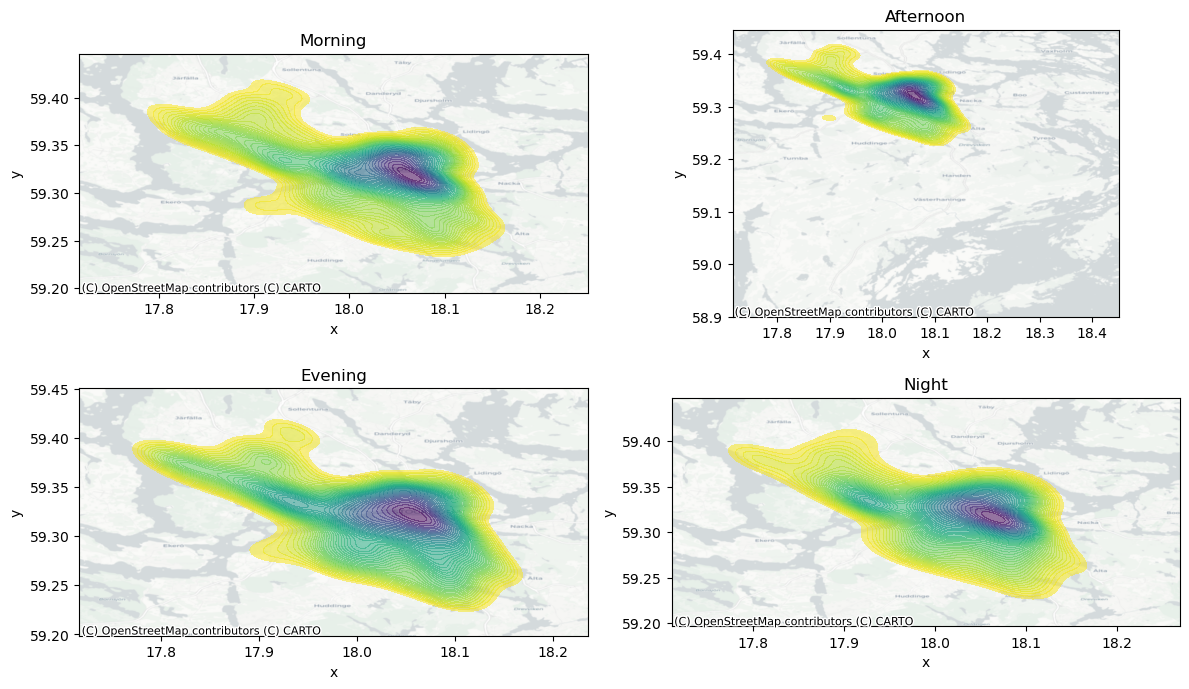

In [4]:
berom_df = data[data['Kategori'] == 'Beröm']

# Split the data into four groups based on 'Time_of_Day'
morning_data = berom_df[berom_df['Time_of_Da'] == 'Morning']
afternoon_data = berom_df[berom_df['Time_of_Da'] == 'Afternoon']
evening_data = berom_df[berom_df['Time_of_Da'] == 'Evening']
night_data = berom_df[berom_df['Time_of_Da'] == 'Night']

fig = plt.figure(figsize=(12, 7))
gs = GridSpec(2, 2)
def create_heatmap(data, title, ax):
    sb.kdeplot(
        x="x",
        y="y",
        data=data,
        n_levels=50,
        shade=True,
        alpha=0.55,
        cmap="viridis_r",
        ax=ax
    )
    ax.set_title(title)
    ctx.add_basemap(ax, crs=data.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax1 = plt.subplot(gs[0, 0])
create_heatmap(morning_data, 'Morning', ax1)

ax2 = plt.subplot(gs[0, 1])
create_heatmap(afternoon_data, 'Afternoon', ax2)

ax3 = plt.subplot(gs[1, 0])
create_heatmap(evening_data, 'Evening', ax3)

ax4 = plt.subplot(gs[1, 1])
create_heatmap(night_data, 'Night', ax4)
plt.tight_layout()
plt.show()

In [5]:
# fig, ax = plt.subplots(figsize=(15, 15))
# create_heatmap(morning_data, 'Morning', ax)
# # create_heatmap(afternoon_data, 'Afternoon', ax)
# # create_heatmap(evening_data, 'Evening', ax)
# # create_heatmap(night_data, 'Night', ax)
# plt.tight_layout()
# plt.show()

In [6]:
# fig, ax = plt.subplots(figsize=(15, 15))
# create_heatmap(afternoon_data, 'Afternoon', ax)
# # create_heatmap(evening_data, 'Evening', ax)
# # create_heatmap(night_data, 'Night', ax)
# plt.tight_layout()
# plt.show()

In [7]:
# fig, ax = plt.subplots(figsize=(15, 15))
# create_heatmap(evening_data, 'Evening', ax)
# # create_heatmap(night_data, 'Night', ax)
# plt.tight_layout()
# plt.show()

In [8]:
# fig, ax = plt.subplots(figsize=(15, 15))
# create_heatmap(night_data, 'Night', ax)
# plt.tight_layout()
# plt.show()

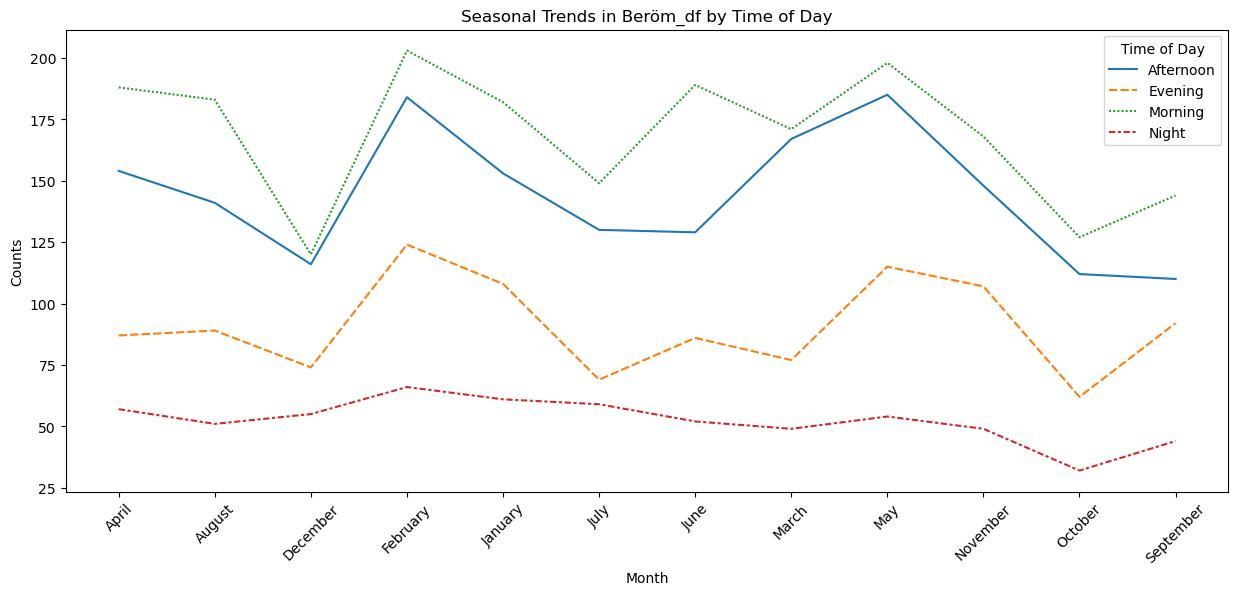

In [9]:
season_time_counts = berom_df.groupby(['Month', 'Time_of_Da']).size().reset_index(name='counts')

season_time_pivot = season_time_counts.pivot(index='Month', columns='Time_of_Da', values='counts')
plt.figure(figsize=(15, 6))
sb.lineplot(data=season_time_pivot)
plt.title('Seasonal Trends in Beröm_df by Time of Day')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Time of Day', loc='upper right')
plt.show()

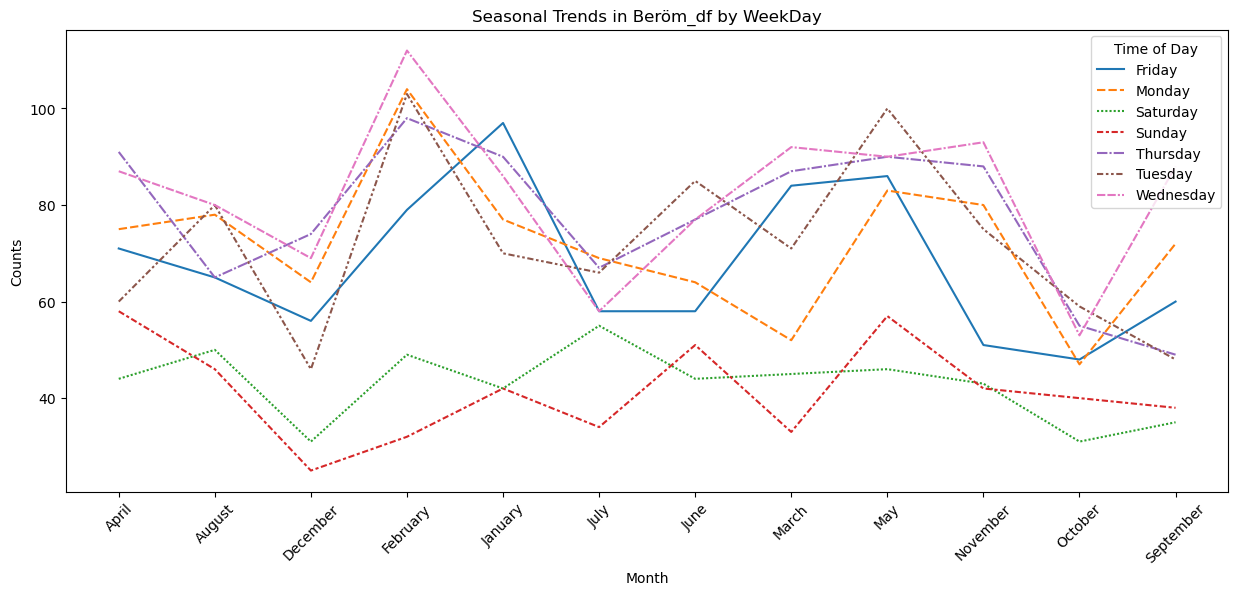

In [10]:
season_time_counts = berom_df.groupby(['Month', 'Weekday']).size().reset_index(name='counts')
season_time_pivot = season_time_counts.pivot(index='Month', columns='Weekday', values='counts')

plt.figure(figsize=(15, 6))
sb.lineplot(data=season_time_pivot)
plt.title('Seasonal Trends in Beröm_df by WeekDay')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Time of Day', loc='upper right')
plt.show()

## Spatio-temporal trends for droger, slagsmål, våld, räd..

In [11]:
data.head()

,Ärendenum,Kategori,Gata_Gator,Gatunummer,Områdesty,Inkommet_D,DpFeatureT,SynpunktCo,Koordinate,Koordina_1,Season,Time_of_Da,Month,Weekday,Year,geometry,x,y
0,2,Fråga,Tackjärnsvägen,2,Gata,2018-01-01,Städning,NaN,148361.65,6581124.62,Winter,Morning,January,Monday,2018,POINT (17.97121 59.34520),17.971206,59.345205
1,3,Fråga,Drottningholmsvägen,428,Gata,2018-01-01,Parkering,NaN,146492.62,6580523.56,Winter,Morning,January,Monday,2018,POINT (17.93837 59.33980),17.938368,59.339798
2,4,Fråga,Gamla Bromstensvägen,111,Gata,2018-01-01,Gatuunderhåll,NaN,145686.55,6583814.34,Winter,Morning,January,Monday,2018,POINT (17.92414 59.36933),17.924137,59.369331
3,5,Fråga,Frejgatan,1,Gata,2018-01-01,Generellt,NaN,153530.46,6581497.33,Winter,Morning,January,Monday,2018,POINT (18.06205 59.34854),18.062054,59.348539
4,8,Klagomål,Ljusstöparbacken,16,Gata,2018-01-01,Bänkar,Bänkar,150554.00,6577753.00,Winter,Morning,January,Monday,2018,POINT (18.00973 59.31494),18.009728,59.314942


In [12]:
# List of keywords relating with droger, slagsmål, våld, räd..
keywords = ['Narkotika', 'droganvändning', 'Narkotika / droganvändning', 'Narkotika, droganvändning', 
            'Person eller grupp som stör den allmänna ordningen', 'Grupp som bråkar/stökar']
keyword_counts = {keyword: 0 for keyword in keywords}

# Count occurrences in 'DpFeatureType' and 'SynpunktCommonWord'
for keyword in keywords:
    count_in_dpfeaturetype = (data['DpFeatureT'] == keyword).sum()
    count_in_synpunktcommonword = (data['SynpunktCo'] == keyword).sum()
    keyword_counts[keyword] = count_in_dpfeaturetype + count_in_synpunktcommonword

keyword_counts

{'Narkotika': 0,
 'droganvändning': 0,
 'Narkotika / droganvändning': 1786,
 'Narkotika, droganvändning': 1786,
 'Person eller grupp som stör den allmänna ordningen': 2437,
 'Grupp som bråkar/stökar': 1666}

In [13]:
key_df = data[data['DpFeatureT'].isin(keywords) | data['SynpunktCo'].isin(keywords)]
key_df.head()

,Ärendenum,Kategori,Gata_Gator,Gatunummer,Områdesty,Inkommet_D,DpFeatureT,SynpunktCo,Koordinate,Koordina_1,Season,Time_of_Da,Month,Weekday,Year,geometry,x,y
317625,1128,Ordningsstörning,Johan Skyttes Väg,194,Gata,2021-07-09,Narkotika / droganvändning,"Narkotika, droganvändning",150438.528974,6.573706e+06,Summer,Night,July,Friday,2021,POINT (18.00769 59.27861),18.007692,59.278610
317627,1130,Ordningsstörning,Sjöviksvägen,83,Gata,2021-07-10,Grupp som bråkar/stökar,Grupp som bråkar/stökar,152020.529371,6.576702e+06,Summer,Night,July,Saturday,2021,POINT (18.03547 59.30551),18.035469,59.305507
317628,1131,Ordningsstörning,Sibeliusgången,19D,Gata,2021-07-10,Person eller grupp som stör den allmänna ordni...,Person eller grupp som stör den allmänna ordni...,145039.748008,6.588951e+06,Summer,Morning,July,Saturday,2021,POINT (17.91264 59.41544),17.912643,59.415435
317633,1136,Ordningsstörning,Sibeliusgången,18A,Gata,2021-07-12,Person eller grupp som stör den allmänna ordni...,Person eller grupp som stör den allmänna ordni...,145303.081740,6.588773e+06,Summer,Morning,July,Monday,2021,POINT (17.91728 59.41384),17.917285,59.413841
317634,1137,Ordningsstörning,Sibeliusgången,19D,Gata,2021-07-12,Person eller grupp som stör den allmänna ordni...,Person eller grupp som stör den allmänna ordni...,145036.461161,6.588942e+06,Summer,Morning,July,Monday,2021,POINT (17.91259 59.41535),17.912585,59.415351


In [14]:
# fig, ax1 = plt.subplots(figsize=(10, 10))
# sb.kdeplot(
#     x="x",
#     y="y",
#     data=key_df,
#     n_levels=50,
#     shade=True,
#     alpha=0.55,
#     cmap="viridis_r",
#     ax=ax1
# )
# ax1.set_title('All')
# ctx.add_basemap(ax1, crs=data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
# plt.show()

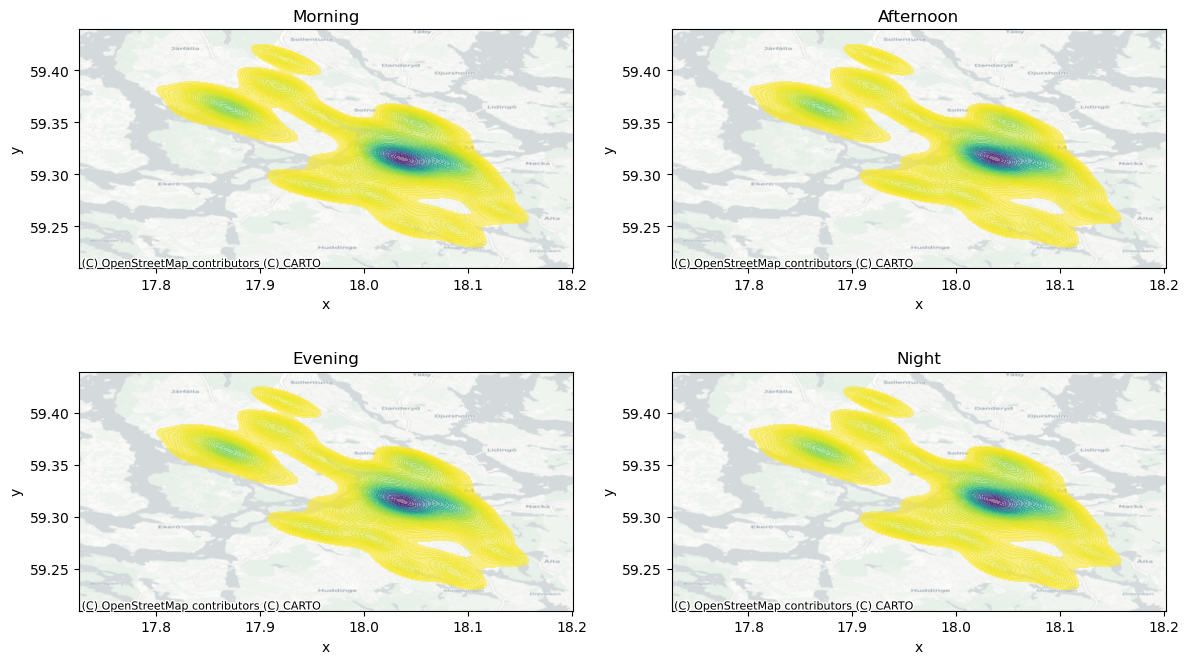

In [15]:
# Split the data into four groups based on 'Time_of_Day'
morning_drog = key_df[key_df['Time_of_Da'] == 'Morning']
afternoon_drog = key_df[key_df['Time_of_Da'] == 'Afternoon']
evening_drog = key_df[key_df['Time_of_Da'] == 'Evening']
night_drog = key_df[key_df['Time_of_Da'] == 'Night']

fig = plt.figure(figsize=(12, 7))
gs = GridSpec(2, 2)
def create_heatmap(data, title, ax):
    sb.kdeplot(
        x="x",
        y="y",
        data=key_df,
        n_levels=50,
        shade=True,
        alpha=0.55,
        cmap="viridis_r",
        ax=ax
    )
    ax.set_title(title)
    ctx.add_basemap(ax, crs=data.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax1 = plt.subplot(gs[0, 0])
create_heatmap(morning_drog, 'Morning', ax1)

ax2 = plt.subplot(gs[0, 1])
create_heatmap(afternoon_drog, 'Afternoon', ax2)

ax3 = plt.subplot(gs[1, 0])
create_heatmap(evening_drog, 'Evening', ax3)

ax4 = plt.subplot(gs[1, 1])
create_heatmap(night_drog, 'Night', ax4)
plt.tight_layout()
plt.show()

In [16]:
# fig, ax = plt.subplots(figsize=(15, 15))
# create_heatmap(afternoon_drog, 'Morning', ax)
# # create_heatmap(afternoon_drog, 'Afternoon', ax)
# # create_heatmap(evening_drog, 'Evening', ax)
# # create_heatmap(night_drog, 'Night', ax)
# plt.tight_layout()
# plt.show()

In [17]:
# fig, ax = plt.subplots(figsize=(15, 15))
# create_heatmap(afternoon_drog, 'Afternoon', ax)
# # create_heatmap(evening_drog, 'Evening', ax)
# # create_heatmap(night_drog, 'Night', ax)
# plt.tight_layout()
# plt.show()

In [18]:
# fig, ax = plt.subplots(figsize=(15, 15))
# create_heatmap(evening_drog, 'Evening', ax)
# # create_heatmap(night_drog, 'Night', ax)
# plt.tight_layout()
# plt.show()

In [19]:
# fig, ax = plt.subplots(figsize=(15, 15))
# create_heatmap(night_drog, 'Night', ax)
# plt.tight_layout()
# plt.show()

In [20]:
import seaborn as sns
import contextily as ctx
import matplotlib.pyplot as plt

def create_heatmap(data, title, filename, north, south, east, west):
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.kdeplot(
        x=data.geometry.x,
        y=data.geometry.y,
        shade=True,
        alpha=0.55,
        cmap="viridis_r",
        ax=ax
    )
    ax.set_title(title)
    ctx.add_basemap(ax, crs=data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

north, south, east, west = 59.45, 59.20, 18.2, 17.75
times_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']
dataframes = [morning_drog, afternoon_drog, evening_drog, night_drog]
filenames = []

for time, df in zip(times_of_day, dataframes):
    filename = f'heatmap_{time}.png'
    create_heatmap(df, time, filename, north, south, east, west)
    filenames.append(filename)

In [21]:
images = [imageio.imread(filename) for filename in filenames] # Create a GIF
imageio.mimsave('heatmap_animation.gif', images, fps=1)  # Adjust fps as needed

In [22]:
data['Inkommet_D'] = pd.to_datetime(data['Inkommet_D'])
berom_df = data[data['Kategori'] == 'Beröm']
berom_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5470 entries, 8 to 790481
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ärendenum   5470 non-null   int64         
 1   Kategori    5470 non-null   object        
 2   Gata_Gator  5467 non-null   object        
 3   Gatunummer  5114 non-null   object        
 4   Områdesty   5470 non-null   object        
 5   Inkommet_D  5470 non-null   datetime64[ns]
 6   DpFeatureT  5470 non-null   object        
 7   SynpunktCo  5282 non-null   object        
 8   Koordinate  5470 non-null   float64       
 9   Koordina_1  5470 non-null   float64       
 10  Season      5470 non-null   object        
 11  Time_of_Da  5470 non-null   object        
 12  Month       5470 non-null   object        
 13  Weekday     5470 non-null   object        
 14  Year        5470 non-null   int64         
 15  geometry    5470 non-null   geometry      
 16  x           5470 no

In [23]:
import calendar

def create_monthly_heatmap(df, year, month, filename, north, south, east, west):
    monthly_data = df[(df['Inkommet_D'].dt.year == year) & (df['Inkommet_D'].dt.month == month)]
    if not monthly_data.empty:
        title = f'{calendar.month_name[month]} {year}'
        create_heatmap(monthly_data, title, filename, north, south, east, west)

north, south, east, west = 59.45, 59.20, 18.2, 17.75
filenames = []

for year in berom_df['Inkommet_D'].dt.year.unique():
    for month in range(1, 13):  # 1 to 12 months
        filename = f'heatmap_{year}_{month}.png'
        create_monthly_heatmap(berom_df, year, month, filename, north, south, east, west)
        filenames.append(filename)

In [24]:
images = [imageio.imread(filename) for filename in filenames]
imageio.mimsave('monthly_heatmap_animation.gif', images, fps=1)

In [25]:
import seaborn as sns
import contextily as ctx
import matplotlib.pyplot as plt
import imageio
import numpy as np

# Your existing create_heatmap function
def create_heatmap(data, title, filename, north, south, east, west):
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.kdeplot(
        x=data.geometry.x,
        y=data.geometry.y,
        shade=True,
        alpha=0.55,
        cmap="viridis_r",
        ax=ax
    )
    ax.set_title(title)
    ctx.add_basemap(ax, crs=data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Function to create transition frames
def create_transition_frames(image1, image2, steps=10):
    transition_frames = []
    for t in range(1, steps + 1):
        transition_image = (t/steps) * image2 + (1 - t/steps) * image1
        transition_frames.append(transition_image.astype(np.uint8))
    return transition_frames

# Generate the heatmap images
north, south, east, west = 59.45, 59.20, 18.2, 17.75
times_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']
dataframes = [morning_drog, afternoon_drog, evening_drog, night_drog]
filenames = []

for time, df in zip(times_of_day, dataframes):
    filename = f'heatmap_{time}.png'
    create_heatmap(df, time, filename, north, south, east, west)
    filenames.append(filename)

# Generate GIF with transition frames
gif_frames = []
for i in range(len(filenames) - 1):
    image1 = imageio.imread(filenames[i])
    image2 = imageio.imread(filenames[i + 1])
    gif_frames.append(image1)
    gif_frames.extend(create_transition_frames(image1, image2))

gif_frames.append(imageio.imread(filenames[-1]))  # Add the last frame
imageio.mimsave('heatmap_animation_with_transitions.gif', gif_frames, fps=1)

In [26]:
import calendar

def create_monthly_heatmap(df, year, month, filename, north, south, east, west):
    monthly_data = df[(df['Inkommet_D'].dt.year == year) & (df['Inkommet_D'].dt.month == month)]
    if not monthly_data.empty:
        title = f'{calendar.month_name[month]} {year}'
        create_heatmap(monthly_data, title, filename, north, south, east, west)

north, south, east, west = 59.45, 59.20, 18.2, 17.75
filenames = []

for year in berom_df['Inkommet_D'].dt.year.unique():
    for month in range(1, 13):  # 1 to 12 months
        filename = f'heatmap_{year}_{month}.png'
        create_monthly_heatmap(berom_df, year, month, filename, north, south, east, west)
        filenames.append(filename)
def create_transition_frames(image1, image2, steps=5):  # Fewer steps for faster transitions
    transition_frames = []
    for t in range(1, steps + 1):
        transition_image = (t/steps) * image2 + (1 - t/steps) * image1
        transition_frames.append(transition_image.astype(np.uint8))
    return transition_frames
import imageio
import numpy as np

gif_frames = []
for i in range(len(filenames) - 1):
    image1 = imageio.imread(filenames[i])
    image2 = imageio.imread(filenames[i + 1])
    gif_frames.append(image1)
    gif_frames.extend(create_transition_frames(image1, image2))

gif_frames.append(imageio.imread(filenames[-1]))  # Add the last frame

# Higher fps for a faster GIF
imageio.mimsave('monthly_heatmap_animation_with_transitions.gif', gif_frames, fps=4)  # Adjust fps as needed